In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# dataset = pd.read_csv('LD2011_2014.csv', sep=';')

### Pre-Processing
>mengubah tipe data string atau object menjadi float, mengatur index dataframe datetime, dan merubah semua dataframe menjadi numeric

In [3]:
def to_float(column):
    if column.dtype == "object":
        return column.apply(lambda x : x.replace(',', '.') if type(x) == str else x)
    else:
        return column

In [4]:
def dts(file: str):
    data = pd.read_csv(file, sep=';')
    data.set_index('Date_Time', inplace=True)
    data = data.apply(to_float)
    data = data.apply(pd.to_numeric)
    return data

In [5]:
datasets = dts('LD2011_2014.csv')

C:\Users\user\AppData\Local\Temp/ipykernel_16744/477166643.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, sep=';')


In [6]:
# membaca dataset yang sudah diprocessing
datasets.head(5)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Date_Time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# menyimpan data yang diprocessing ke file csv
datasets.to_csv("dataset.csv")

In [8]:
datasets = pd.read_csv('dataset.csv', index_col = 'Date_Time')

In [9]:
# mengecek tipe data
datasets.dtypes

MT_001    float64
MT_002    float64
MT_003    float64
MT_004    float64
MT_005    float64
           ...   
MT_366    float64
MT_367    float64
MT_368    float64
MT_369    float64
MT_370    float64
Length: 370, dtype: object

## Clustering K-Means

In [10]:
# menentukan jumlah kluster pada model k-means
kmeans = KMeans(n_clusters = 5)

In [11]:
# melakukan fit pada model
kmeans.fit(datasets)

KMeans(n_clusters=5)

In [12]:
# menentukan label untuk cluster
label = kmeans.labels_
print(label)

[3 3 3 ... 0 0 0]


In [13]:
# mengambil semua baris pada kolom
x = datasets.iloc[:,0]
y = datasets.iloc[:,1]

In [14]:
# menampung koordinat dari tiap centroid
centroid = kmeans.cluster_centers_

In [15]:
centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

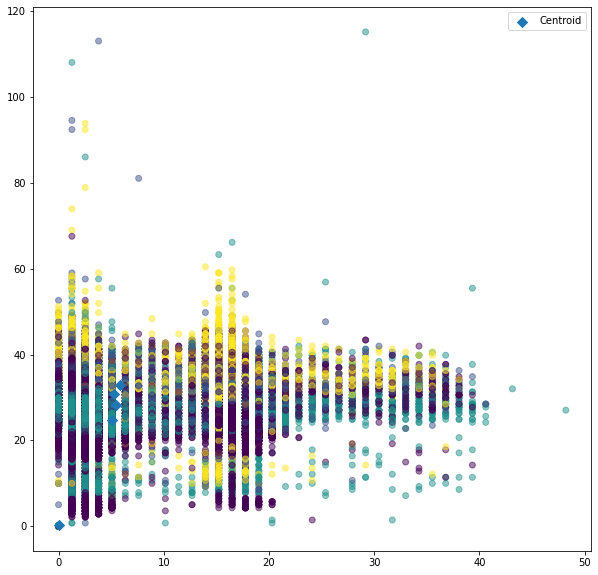

In [16]:
# visualisasi cluster
plt.figure(figsize = (10,10))
plt.scatter(x, y, alpha = 0.5, c = label)
plt.scatter(centroid_x, centroid_y, marker = 'D', s = 50, label = 'Centroid')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [17]:
# menentukan jumlah cluster
kmeans_clustering = range(1,6)
inertias = []

for k in kmeans_clustering:
    model = KMeans(n_clusters = k)
    model.fit(datasets)
    inertias.append(model.inertia_)

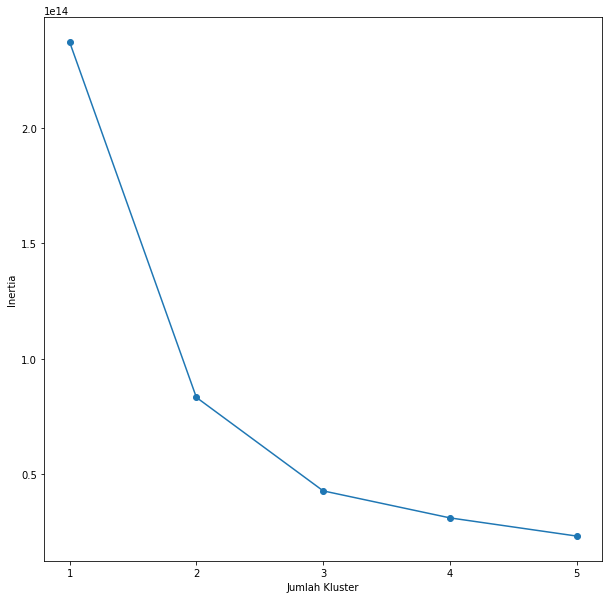

In [18]:
# plot kmeans vs inertias
plt.figure(figsize=(10,10))
plt.plot(kmeans_clustering, inertias, '-o')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inertia')
plt.xticks(kmeans_clustering)
plt.show()